Hello, would you like to check city pollution data? [yes/no] yes
Please enter the city name: B
Invalid Input. Only Beijing, Chengdu, Guangzhou, Hongkong, Shanghai, Wuhan are supported now.
Hello, would you like to check city pollution data? [yes/no] yes
Please enter the city name: Chengdu
Please enter the name of the pollution: SO3
Invalid Input. Only PM2.5, PM10, O3, NO2, SO2, CO are supported now.
Hello, would you like to check city pollution data? [yes/no] yes
Please enter the city name: Chengdu
Please enter the name of the pollution: SO2
Please enter years you want to check (separate by space): 2014 2015


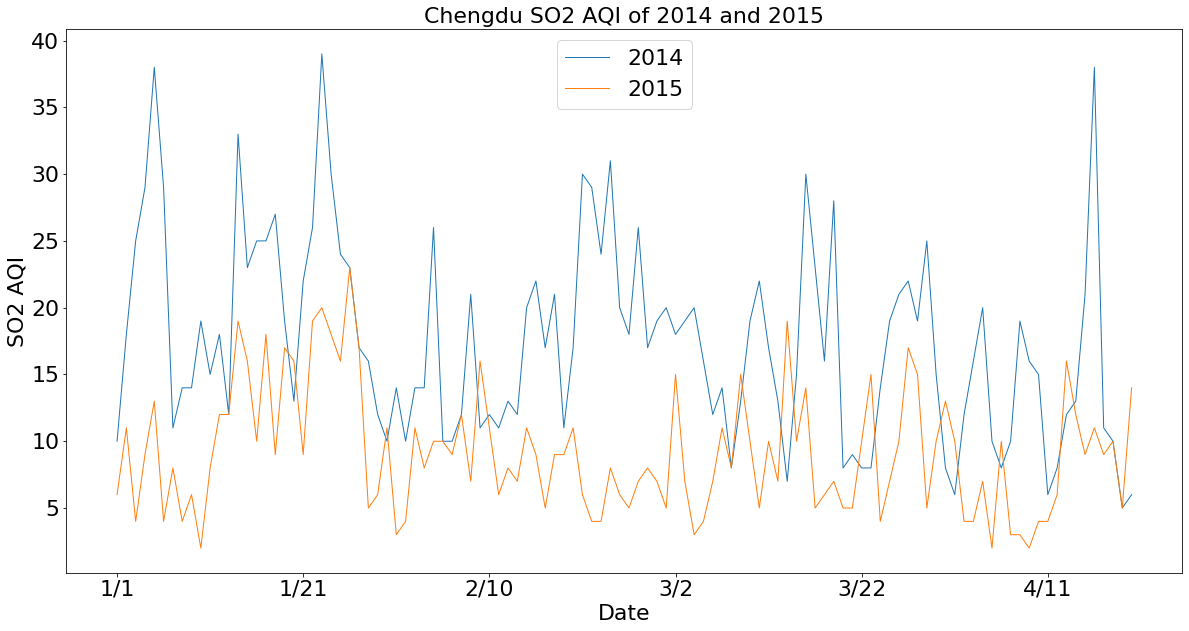

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math

%matplotlib inline
def is_valid_float(i):
    if i not in [" ", "nan"] and (math.isnan(float(i))) == False:
        return True
    else:
        return False
    

# read original data
beijing = (pd.read_csv('Beijing.csv'))
chengdu = (pd.read_csv('Chengdu.csv'))
guangzhou = (pd.read_csv('Guangzhou.csv'))
hongkong = (pd.read_csv('Hongkong.csv'))
shanghai = (pd.read_csv('Shanghai.csv'))
wuhan = (pd.read_csv('Wuhan.csv'))

city_dict = {
    "Beijing": beijing,
    "Chengdu": chengdu,
    "Guangzhou": guangzhou,
    "Hongkong": hongkong,
    "Shanghai": shanghai,
    "Wuhan": wuhan
}

while (True):
    ans = input("Hello, would you like to check city pollution data? [yes/no] ")
    if ans == 'no':
        break

    # read city
    city = input("Please enter the city name: ")
    if city in city_dict:
        df = city_dict[city]
    else:
        print("Invalid Input. Only Beijing, Chengdu, Guangzhou, Hongkong, Shanghai, Wuhan are supported now.")
        continue

    df.columns = ["date", "PM25", "PM10", "O3", "NO2", "SO2", "CO"]
    df = df.set_index("date")
    
    # read pollution type
    name = input("Please enter the name of the pollution: ")
    if name == "PM2.5":
        y = df.PM25.tolist()
    elif name == "PM10":
        y = df.PM10.tolist()
    elif name == "O3":
        y = df.O3.tolist()
    elif name == "NO2":
        y = df.NO2.tolist()
    elif name == "SO2":
        y = df.SO2.tolist()
    elif name == "CO":
        y = df.CO.tolist()
    else: 
        print("Invalid Input. Only PM2.5, PM10, O3, NO2, SO2, CO are supported now.")
        continue
        
    # read year range
    years = input("Please enter years you want to check (separate by space): ").split()
    years.sort()
    
    # populate year data
    delimiters = [0, 110, 221, 332, 443, 554, 665]
    final_2014 = []
    final_2015 = []
    final_2016 = []
    final_2017 = []
    final_2018 = []
    final_2019 = []
    final_2020 = []
    final_lists = [final_2014, final_2015, final_2016, final_2017, final_2018, final_2019, final_2020]
    for i in range(7):
        if i < 6:
            for j in y[delimiters[i]: delimiters[i+1]]:
                if is_valid_float(j):
                    final_lists[i].append(int(j))
        else:
            for j in y[delimiters[i]:]:
                if is_valid_float(j):
                    final_lists[i].append(int(j))

    # make figure + axes
    fig, ax = plt.subplots(tight_layout=False, figsize = (20,10))
    ax.set_xlabel('Date', fontsize = 22)
    ax.set_ylabel(name + " AQI", fontsize = 22)
    # set titles according to input years:
    # if only one year data is queried, title is <city> <pollution> AQI of <year>
    # if two years data are queried, title is <city> <pollution> AQI of <year1> and <year2>
    # if three year data are queried, title is <city> <pollution> AQI of <year1>, <year2> and <year3>
    # if more than three years data are queried, title is <city> <pollution> AQI from <start year> to <end year>
    if len(years) == 1:
        ax.set_title(city + " " + name + " AQI of " + years[0], fontsize = 22)
    elif len(years) == 2:
        ax.set_title(city + " " + name + " AQI of " + years[0] + " and " + years[1] , fontsize = 22)
    elif len(years) == 3:
        ax.set_title(city + " " + name + " AQI of " + years[0] + ", " + years[1] + " and " + years[2] , fontsize = 22)
    else:
        ax.set_title(city + " " + name + " AQI from " + years[0] + " to " + years[-1] , fontsize = 22)

    final_year_dict = {
        "2014": final_2014,
        "2015": final_2015,
        "2016": final_2016,
        "2017": final_2017,
        "2018": final_2018,
        "2019": final_2019,
        "2020": final_2020
    }
    # draw data in one figure
    # emphasize 2020 data with bold and black line
    for year in years:
        if year == "2020":
            ln1, = ax.plot(final_2020, lw=5, label = "2020", color = "black")
        else:
            ln1, = ax.plot(final_year_dict[year], lw=1, label = year)
    ax.legend(prop={'size': 22})

    # synthetic data
    date_final = []
    for i in df.index:
        if isinstance(i, float) == False:
            date_final.append(i[0: -5])
    d = ['{}'.format(i) for i in date_final[:109]]

    # helper function for the formatter
    def listified_formatter(x, pos=None):
        try:
            return d[int(x)]
        except IndexError:
            return ''

    # make and use the formatter
    mt = mticker.FuncFormatter(listified_formatter)
    ax.xaxis.set_major_formatter(mt)

    # set the default ticker to only put ticks on the integers
    loc = ax.xaxis.get_major_locator()
    loc.set_params(integer=True)

    # rotate the labels
    [lab.set_rotation(0) for lab in ax.get_xticklabels()]
    plt.xticks(fontsize= 22) 
    plt.yticks(fontsize= 22) 
    plt.legend
    break